In [1]:
import h5py
import illustris_python.groupcat as gc
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
basePath = "/Users/forero/Illustris_data/TNG300-1/"


subhalo_fields = ['SubhaloMass','SubhaloSFRinRad', 'SubhaloPos', 'SubhaloVmax','SubhaloMassType',
                  'SubhaloVel', 'SubhaloParent', 'SubhaloGrNr', 'SubhaloStellarPhotometrics']
all_subhalos = gc.loadSubhalos(basePath,99, fields=subhalo_fields)


halo_fields = ['GroupFirstSub', 'Group_M_Crit200', 'Group_R_Crit200', 'Group_M_Mean200',
               'GroupNsubs', 'GroupPos', 'GroupVel', 'GroupFirstSub', 'GroupMassType']
halos = gc.loadHalos(basePath,99, fields=halo_fields)

header = gc.loadHeader(basePath,99)

BoxSize = header['BoxSize']
hubble = header['HubbleParam']
print(BoxSize)

all_subhalos['stellar_mass'] = all_subhalos['SubhaloMassType'][:,4]

205000.0


In [9]:
log_mass = np.log10(halos['Group_M_Crit200']+1E-5)+10.0

In [25]:
delta_log_mass = 0.5
loghalo_mass_range = np.arange(9.0, 15.0, delta_log_mass)
mean_radius = loghalo_mass_range.copy()

for i, min_log_mass in enumerate(loghalo_mass_range):
    ii = (log_mass > min_log_mass) & (log_mass < (min_log_mass + delta_log_mass))
    mean_radius[i] = np.mean(halos['Group_R_Crit200'][ii])
    print(i, np.count_nonzero(ii))

0 5122799
1 2159939
2 946505
3 329406
4 133834
5 52542
6 18453
7 5398
8 1768
9 601
10 138
11 14


Text(0,0.5,'$\\log_{10} R_{h}/{\\rm kpc} h^{-1}$')

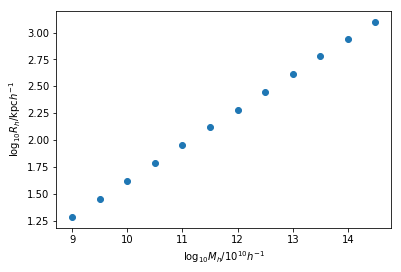

In [23]:
plt.scatter(loghalo_mass_range, np.log10(mean_radius))
plt.xlabel(r"$\log_{10} M_{h}/10^{10} h^{-1}$")
plt.ylabel(r"$\log_{10} R_{h}/{\rm kpc} h^{-1}$")